# Prediction of Conditions in Vertebral Columns Using Classification Techniques

In [3]:
#load packages
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### (a) Download the Vertebral Column Data Set: 

In [4]:
#load data and read the file line by line
Vertebral = open('../vertebral_column_data/column_2C.dat').readlines()

# split each line in the list into individual values using whitespace as the delimiter.
Vertebral = [i.split() for i in Vertebral]

#Change the column name
columns_name = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
                'sacral_slope', 'pelvic_radius', 'grade_of_spondylolisthesis', 'class']

df = pd.DataFrame(columns = columns_name, data = Vertebral)
df.loc[df['class'] == 'NO', ['class']] = 0
df.loc[df['class'] == 'AB',['class']] = 1

#transform the datatype from object to float
df = df.astype(float)
#transform the dependent variable from float to catergory
df['class'] = pd.Categorical(df['class'])

### (b) Pre-Processing and Exploratory data analysis:

#### i. Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1

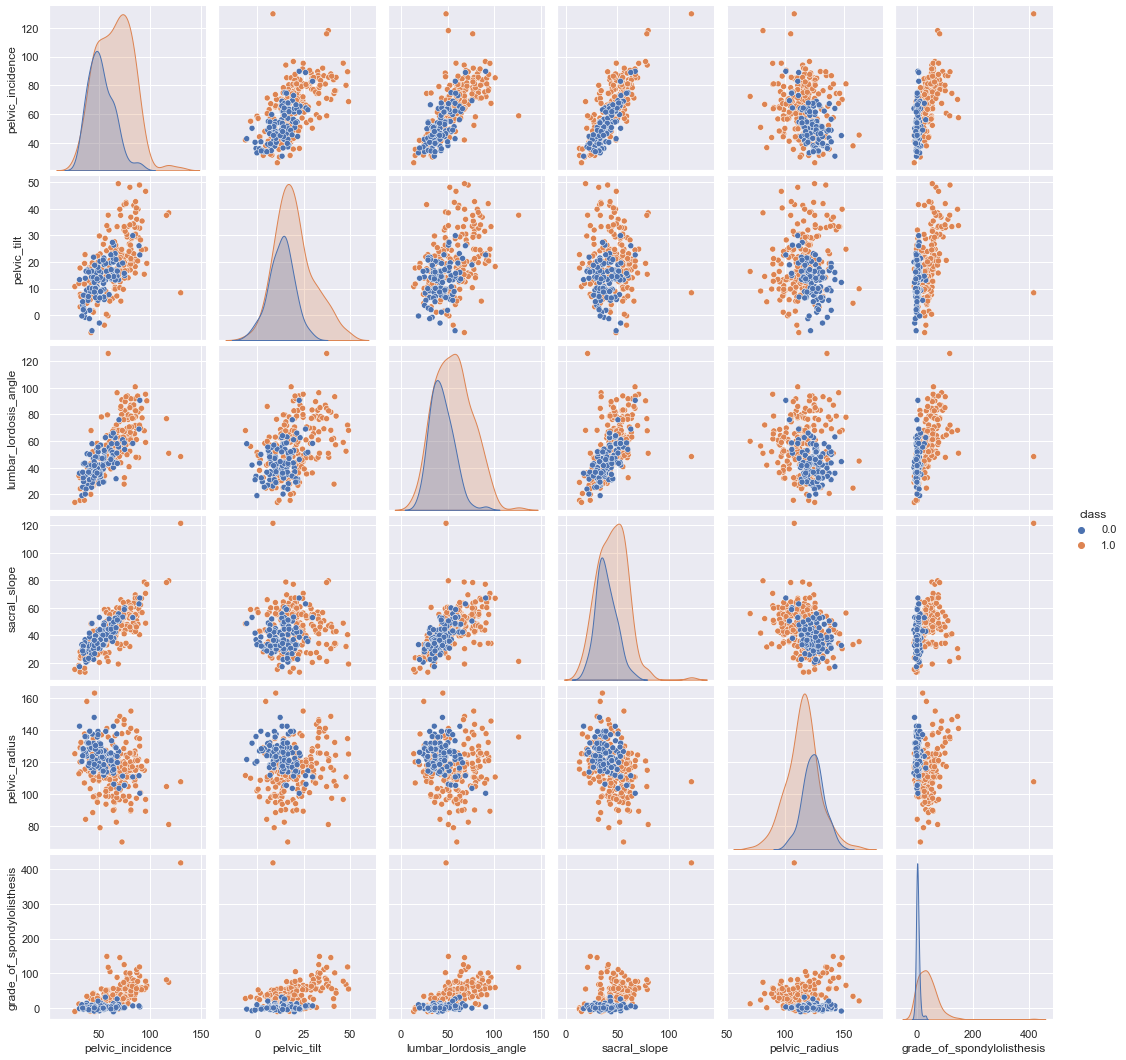

In [186]:
sns.set()
sns.pairplot(data= df,hue = 'class',vars=['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
             'sacral_slope', 'pelvic_radius', 'grade_of_spondylolisthesis'])
plt.show()

#### ii. Make boxplots for each of the independent variables. Use color to show Classes 0 and 1 (see ISLR p. 129)

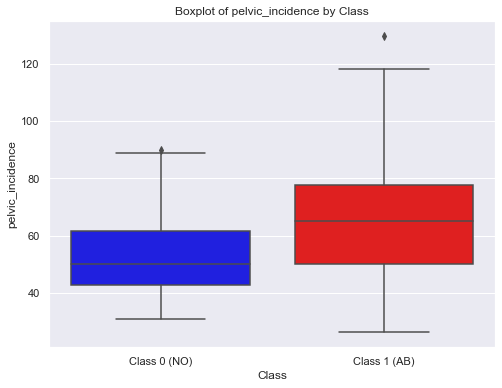

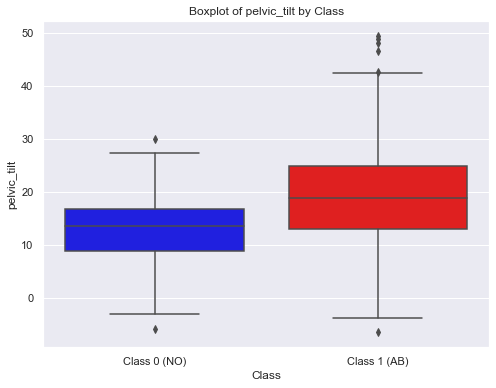

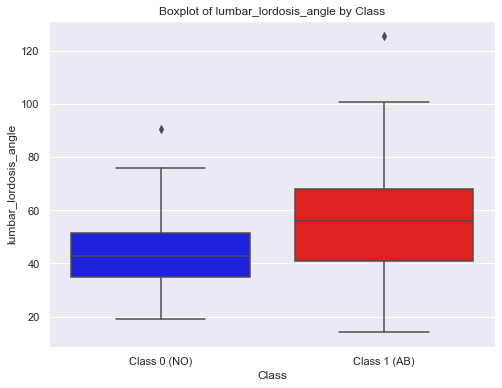

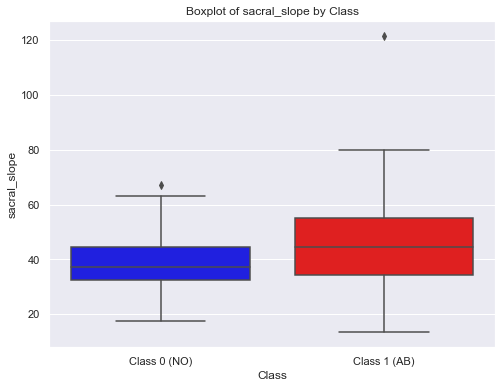

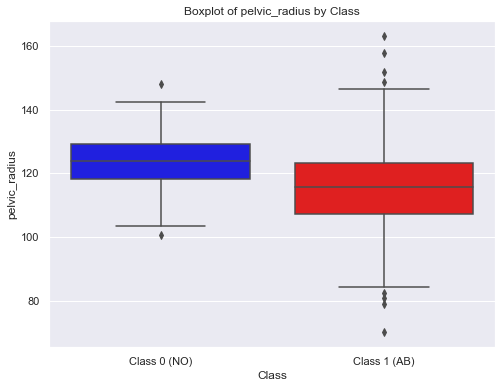

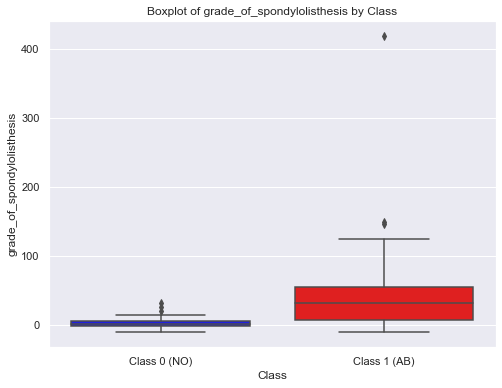

In [187]:
# Set the style
sns.set()

# Specify the independent variables
independent_variables = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
                         'sacral_slope', 'pelvic_radius', 'grade_of_spondylolisthesis']

# Create a boxplot for each independent variable
for v in independent_variables:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='class', y=v, data=df, palette={0: 'blue', 1: 'red'})
    plt.title(f'Boxplot of {v} by Class')
    plt.xlabel('Class')
    plt.ylabel(v)
    plt.xticks([0, 1], ['Class 0 (NO)', 'Class 1 (AB)'])
    plt.show()

#### iii. Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set.

In [188]:
class0 = df.loc[df['class'] == 0]
class1 = df.loc[df['class'] == 1]

train_data = pd.concat([class0.iloc[:70], class1.iloc[:140]], ignore_index=True)
test_data = pd.concat([class0.iloc[71:], class1.iloc[141:]], ignore_index=True)

train_data = pd.DataFrame(train_data)
test_data = pd.DataFrame(test_data)


### (c) Classification using KNN on Vertebral Column Data Set

#### i. Write code for k-nearest neighbors with Euclidean metric (or use a software package)

In [189]:
# Split train and test data
x_train = train_data[independent_variables]
x_test = test_data[independent_variables]

y_train = train_data['class']
y_test = test_data['class']

k = 3 # choose a random k to construct KNN model
# construct KNN model, neighbors = k, metric = euclidean
knn = KNeighborsClassifier(n_neighbors= k, metric = 'euclidean')

#### ii. Test all the data in the test database with k nearest neighbors. Take decisions by majority polling. Plot train and test errors in terms of k for k ∈ {208, 205, . . . , 7, 4, 1, } (in reverse order). You are welcome to use smaller increments of k. Which k* is the most suitable k among those values? Calculate the confusion matrix, true positive rate, true negative rate, precision, and F-score when k = k*.

In [190]:
bestk = 0
bestscore = 0

k_values_c = list(range(1,209,3))

for k in k_values_c:
    knn = KNeighborsClassifier(n_neighbors= k, metric = 'euclidean')
    knn.fit(x_train, y_train) # fit the model using training data
    test_y_predict = knn.predict(x_test) # predict y for test data
    score = knn.score(x_test,y_test) # calculate accuracy score
    if score >= bestscore:
        bestscore = score
        bestk = k 
   
print("The most suitable K* is:")
print(bestk)
print("The accuracy score for this k is:")
print(bestscore)

The most suitable K* is:
4
The accuracy score for this k is:
0.9387755102040817


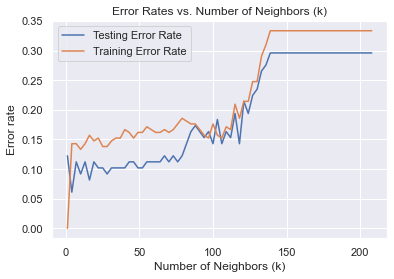

In [191]:
# Plot train and test errors in terms of k

k_values = list(range(208, 0, -3)) #Generate a list containing values of k for k ∈ {208, 205, 202, ..., 7, 4, 1}

train_error = [] #create list to store train errors
test_error =  [] #create list to store test errors

# generate a while loop to calculate and store train and test errors for each k in the vector
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean') 
    knn.fit(x_train, y_train) #fit the model
    # calculates and stores the error rates for the current k value:
    train_error.append(1 - knn.score(x_train, y_train, sample_weight = None))
    test_error.append(1 - knn.score(x_test, y_test, sample_weight = None))


plt.plot(k_values, test_error, label='Testing Error Rate')
plt.plot(k_values, train_error, label='Training Error Rate')

plt.title('Error Rates vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error rate')
plt.legend()

plt.show()

In [192]:
# confusion matrix
knn = KNeighborsClassifier(n_neighbors=bestk)

# Fit the classifier to the training data
knn.fit(x_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(x_test)

# generate confusion matrix
confmatr_test = confusion_matrix(y_test, y_pred)
print("Confusion matrix for test data:")
print(confmatr_test)


y_pred_train = knn.predict(x_train)
confmatr_train = confusion_matrix(y_train, y_pred_train)
print("Confusion matrix for train data:")
print(confmatr_train)

Confusion matrix for test data:
[[24  5]
 [ 1 68]]
Confusion matrix for train data:
[[ 64   6]
 [ 24 116]]


In [193]:
# calculate F-score + precision:

#get classification report for test data
test_knn_report = classification_report(y_test,y_pred)
#get classification report for train data
train_knn_report = classification_report(y_train,y_pred_train)


#f1_score for test data
f1_score_test = test_knn_report.split('\n')[3].split()[3]
print("F1 Score for test data:", f1_score_test)

#f1_score for train data
f1_score_train = train_knn_report.split('\n')[3].split()[3]
print("F1 Score for train data:", f1_score_train)

#f1_score for test data
Precision_test = test_knn_report.split('\n')[3].split()[1]
print("Precision for test data:", Precision_test)


#f1_score for train data
Precision_train = train_knn_report.split('\n')[3].split()[1]
print("Precision for train data:", Precision_train)

F1 Score for test data: 0.96
F1 Score for train data: 0.89
Precision for test data: 0.93
Precision for train data: 0.95


### iii. Since the computation time depends on the size of the training set, one may only use a subset of the training set. Plot the best test error rate, which is obtained by some value of k, against the size of training set, when the size of training set is N ∈ {10, 20, 30, . . . , 210}. 

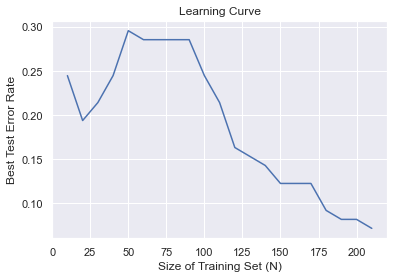

In [194]:
# Initialize lists to store results
N_values = []  # Sizes of training sets
best_test_error_rates = []  # Best test error rates

# Specify the range of N values you want to consider
N_range = range(10, 211, 10)  # Start from 3 to match the fraction requirement

for N in N_range:
    # Create a training set with the specified size
    training_subset = pd.concat([class0.iloc[:N // 3], class1.iloc[:N - (N // 3)]], ignore_index=True)
    y_train2 = training_subset['class']
    x_train2 = training_subset[independent_variables]
    # Initialize variables to track the best k and test error rate
    best_k = None
    best_test_error_rate = float('inf')  # Initialize with a high value

    # Specify the range of k values (starting from 1, increasing by 5)
    k_values = range(1, N - 4, 5)  

    for k in k_values:
        # Create and train a KNN classifier
        knn2 = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
        knn2.fit(x_train2, y_train2)

        # Make predictions on the test set
        y_pred2 = knn2.predict(x_test)

        # Calculate the test error rate
        test_error_rate = 1 - accuracy_score(y_test, y_pred2)

        # Update best test error rate and best k if needed
        if test_error_rate < best_test_error_rate:
            best_test_error_rate = test_error_rate
            best_k = k

    # Append N and the best test error rate to the lists
    N_values.append(N)
    best_test_error_rates.append(best_test_error_rate)

# Plot the learning curve
plt.plot(N_values, best_test_error_rates, linestyle='-')
plt.title('Learning Curve')
plt.xlabel('Size of Training Set (N)')
plt.ylabel('Best Test Error Rate')
plt.grid(True)
plt.show()


### Let us further explore some variants of KNN. <br>
### (d) Replace the Euclidean metric with the following metrics and test them. Summarize the test errors (i.e., when k = k ∗ ) in a table. Use all of your training data and select the best k when {1, 6, 11, . . . , 196}.

#### i. Minkowski Distance:

##### A. which becomes Manhattan Distance with p = 1.

In [195]:
# Define the range of k values
k_values_man = list(range(1,197,5))
best_k_man = 0
best_test_error_rate_man = float("inf")  # Initialize with a large value

for k in k_values_man:
    # Create and train a KNN classifier
    knn_man = KNeighborsClassifier(n_neighbors=k, p=1)
    knn_man.fit(x_train, y_train)

    # Make predictions on the test set
    y_pred_man = knn_man.predict(x_test)

    # Calculate the test error rate
    test_error_rate_man = 1 - accuracy_score(y_test, y_pred_man)

    # Update best test error rate and best k if needed
    if test_error_rate_man < best_test_error_rate_man:
        best_test_error_rate_man = test_error_rate_man
        best_k_man = k

print("Best k (Manhattan Distance):", best_k_man)
print("Best Test Error Rate (Manhattan Distance):", best_test_error_rate_man)


Best k (Manhattan Distance): 11
Best Test Error Rate (Manhattan Distance): 0.10204081632653061


#### B. with log10(p) ∈ {0.1, 0.2, 0.3, . . . , 1}. In this case, use the k∗ you found for the Manhattan distance in 1(d)iA. What is the best log10(p)?

In [196]:
bestscoredB = 0
best_i = 0
log_10_p = np.arange(0.1, 1.1, 0.1)

# Use a for loop with the range of i values
for i in log_10_p:  # Equivalent to i = 0.1, 0.2, 0.3, ..., 1.0
    knn = KNeighborsClassifier(n_neighbors=best_k_man, metric='minkowski', p=pow(10, i))
    knn.fit(x_train, y_train)
    test_y_predict = knn.predict(x_test)
    score = knn.score(x_test, y_test, sample_weight=None)
    
    if score > bestscoredB:
        bestscoredB = score
        best_i = i

print("best log10(p):", besti)

best log10(p): 0.6


#### C. which becomes Chebyshev Distance with p → ∞

In [197]:
# Chebyshev Distance
best_k_che_d = 0
best_test_error_rate_che_d = float("inf")  # Initialize with a large value

for k in k_values_man:
    # Create and train a KNN classifier
    knn_che_d = KNeighborsClassifier(n_neighbors=k, metric='chebyshev', p=float('inf'))
    knn_che_d.fit(x_train, y_train)

    # Make predictions on the test set
    y_pred_che_d = knn_che_d.predict(x_test)

    # Calculate the test error rate
    test_error_rate_che_d = 1 - accuracy_score(y_test, y_pred_che_d)

    # Update best test error rate and best k if needed
    if test_error_rate_che_d < best_test_error_rate_che_d:
        best_test_error_rate_che_d = test_error_rate_che_d
        best_k_che_d = k

print("Best k (Chebyshev Distance):", best_k_che_d)
print("Best Test Error Rate (Chebyshev Distance):", best_test_error_rate_che_d)

Best k (Chebyshev Distance): 16
Best Test Error Rate (Chebyshev Distance): 0.0714285714285714


#### ii. Mahalanobis Distance

In [198]:
cov_matrix = np.cov(x_train, rowvar=False)

# Invert the covariance matrix
inv_cov_matrix = np.linalg.inv(cov_matrix)

best_k_mah = 0
best_test_error_rate_mah = float("inf")  # Initialize with a large value

for k in k_values_mah:
    # Create and train a KNN classifier with Mahalanobis distance
    knn_mah = KNeighborsClassifier(n_neighbors=k, metric="mahalanobis", 
                                   metric_params={"VI": inv_cov_matrix})
    knn_mah.fit(x_train, y_train)

    # Make predictions on the test set
    y_pred_mah = knn_mah.predict(x_test)

    # Calculate the test error rate
    test_error_rate_mah = 1 - accuracy_score(y_test, y_pred_mah)

    # Update best test error rate and best k if needed
    if test_error_rate_mah < best_test_error_rate_mah:
        best_test_error_rate_mah = test_error_rate_mah
        best_k_mah = k
print("Best k (Mahalanobis Distance):", best_k_mah)
print("Best Test Error Rate (Mahalanobis Distance):", best_test_error_rate_mah)

Best k (Mahalanobis Distance): 6
Best Test Error Rate (Mahalanobis Distance): 0.16326530612244894


In [199]:
datae = {'Metrics':['Chebyshev','Manhattan','Mahalanobis'],
         'Best K':[best_k_che_d, best_k_man, best_k_mah],
         'Best Test Error Rate':[best_test_error_rate_che_d, best_test_error_rate_man,best_test_error_rate_mah]}
result_table = pd.DataFrame(datae)
result_table

,Metrics,Best K,Best Test Error Rate
0,Chebyshev,16,0.071429
1,Manhattan,11,0.102041
2,Mahalanobis,6,0.163265


### (e) The majority polling decision can be replaced by weighted decision, in which the weight of each point in voting is proportional to its distance from the query/test data point. In this case, closer neighbors of a query point will have a greater inﬂuence than neighbors which are further away. Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k ∈ {1, 6, 11, 16, . . . , 196}.

In [200]:
k_values_e = list(range(196, 0, -5))

# Manhattan Distance 
best_k_man_e = 0
best_test_error_rate_man_e = float("inf")  # Initialize with a large value

for k in k_values_man:
    # Create and train a KNN classifier
    knn_man_e = KNeighborsClassifier(n_neighbors=k, p=1, weights = 'distance')
    knn_man_e.fit(x_train, y_train)

    # Make predictions on the test set
    y_pred_man_e = knn_man_e.predict(x_test)

    # Calculate the test error rate
    test_error_rate_man_e = 1 - accuracy_score(y_test, y_pred_man_e)

    # Update best test error rate and best k if needed
    if test_error_rate_man_e < best_test_error_rate_man_e:
        best_test_error_rate_man_e = test_error_rate_man_e
        best_k_man_e = k

print("Best k (Manhattan Distance):", best_k_man_e)
print("Best Test Error Rate (Manhattan Distance):", best_test_error_rate_man_e)


Best k (Manhattan Distance): 11
Best Test Error Rate (Manhattan Distance): 0.10204081632653061


In [201]:
# Euclidean Distance  
best_k_euc_e =_e = 0
best_test_error_rate_euc_e = float("inf")  # Initialize with a large value

for k in k_values_e:
    # Create and train a KNN classifier
    knn_euc_e = KNeighborsClassifier(n_neighbors=k, p=2, weights = 'distance')
    knn_euc_e.fit(x_train, y_train)

    # Make predictions on the test set
    y_pred_euc_e = knn_euc_e.predict(x_test)

    # Calculate the test error rate
    test_error_rate_euc_e = 1 - accuracy_score(y_test, y_pred_euc_e)

    # Update best test error rate and best k if needed
    if test_error_rate_euc_e < best_test_error_rate_euc_e:
        best_test_error_rate_euc_e = test_error_rate_euc_e
        best_k_euc_e = k

print("Best k (Euclidean metric):", best_k_euc_e)
print("Best Test Error Rate (Euclidean metric):", best_test_error_rate_euc_e)


Best k (Euclidean metric): 6
Best Test Error Rate (Euclidean metric): 0.09183673469387754


In [202]:
# Chebyshev Distance
best_k_che_e = 0
best_test_error_rate_che_e = float("inf")  # Initialize with a large value

for k in k_values_e:
    # Create and train a KNN classifier
    knn_che_e = KNeighborsClassifier(n_neighbors=k, metric='chebyshev', weights = 'distance')
    knn_che_e.fit(x_train, y_train)

    # Make predictions on the test set
    y_pred_che_e = knn_che_e.predict(x_test)

    # Calculate the test error rate
    test_error_rate_che_e = 1 - accuracy_score(y_test, y_pred_che_e)

    # Update best test error rate and best k if needed
    if test_error_rate_che_e < best_test_error_rate_che_e:
        best_test_error_rate_che_e = test_error_rate_che_e
        best_k_che_e = k

print("Best k (Chebyshev Distance):", best_k_che_e)
print("Best Test Error Rate (Chebyshev Distance):", best_test_error_rate_che_e)

Best k (Chebyshev Distance): 61
Best Test Error Rate (Chebyshev Distance): 0.10204081632653061


In [97]:
result_e = {'Metrics':['Euclidean','Manhattan','Chebyshev'],
         'Best K':[best_k_euc_e, best_k_man_e, best_k_che_e],
         'Best Test Error Rate':[best_test_error_rate_euc_e, best_test_error_rate_man_e,best_test_error_rate_che_e]}
result_table_2 = pd.DataFrame(result_e)
result_table_2

,Metrics,Best K,Best Test Error Rate
0,Euclidean,6,0.091837
1,Manhattan,71,0.102041
2,Chebyshev,61,0.102041
